In [ ]:
devtools::install_github("Wei-BioMath/NeuronChat")

Rcpp         (1.0.11       -> 1.0.12      ) [CRAN]
rlang        (1.1.2        -> 1.1.3       ) [CRAN]
glue         (1.6.2        -> 1.7.0       ) [CRAN]
cli          (3.6.1        -> 3.6.2       ) [CRAN]
dotCall64    (1.0-2        -> 1.1-1       ) [CRAN]
digest       (0.6.33       -> 0.6.34      ) [CRAN]
future       (1.33.0       -> 1.33.1      ) [CRAN]
BH           (1.81.0-1     -> 1.84.0-0    ) [CRAN]
dqrng        (0.3.1        -> 0.3.2       ) [CRAN]
FNN          (1.1.3.2      -> 1.1.4       ) [CRAN]
vctrs        (0.6.4        -> 0.6.5       ) [CRAN]
fansi        (1.0.5        -> 1.0.6       ) [CRAN]
deldir       (1.0-9        -> 2.0-2       ) [CRAN]
spatstat.... (3.0-3        -> 3.0-4       ) [CRAN]
spatstat.... (3.0-1        -> 3.0-4       ) [CRAN]
spatstat.... (3.0-2        -> 3.0-3       ) [CRAN]
spatstat.... (3.1-6        -> 3.2-2       ) [CRAN]
spatstat.... (3.2-5        -> 3.2-7       ) [CRAN]
sass         (0.4.7        -> 0.4.8       ) [CRAN]
bslib        (0.5.1        -> 0

Skipping 2 packages not available: Biobase, ComplexHeatmap

Installing 59 packages: Rcpp, rlang, glue, cli, dotCall64, digest, future, BH, dqrng, FNN, vctrs, fansi, deldir, spatstat.utils, spatstat.data, spatstat.sparse, spatstat.random, spatstat.geom, sass, bslib, withr, later, htmltools, jsonlite, httpuv, stringi, stringr, scales, RcppArmadillo, matrixStats, future.apply, dplyr, gtools, rprojroot, tinytex, cpp11, curl, yaml, data.table, crosstalk, htmlwidgets, shiny, igraph, reticulate, spam, sp, spatstat.explore, sctransform, Rtsne, RcppHNSW, plotly, patchwork, leiden, ggridges, ggrepel, fastDummies, cowplot, SeuratObject, Seurat

also installing the dependency ‘Matrix’


Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘fansi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘curl’ had non-zero exit status”
Warning message in i.p(...):
“installation of package

In [1]:
library(NeuronChat)
library(CellChat)
library(ggalluvial)
library(glue)
library(Seurat)
library(SeuratDisk)
library(stringr)
library(gridExtra)
library(grid)
library(circlize)
library(colorspace)
library(ComplexHeatmap)
library(NMF)
source("src/diffInteraction.r")
source("src/rankNet.r")
source("src/netVisual_chord.r")
source("src/NMF.r")
source("src/NMF_and_river_OUT.r")
source("src/NMF_and_river_IN.r")
source("src/MY_netAnalysis_river_Neuron.r")
source("src/MY_mergedRiver.r")

ERROR: Error in library(NeuronChat): there is no package called ‘NeuronChat’


In [2]:
strict <- 0                    # (1, or 0) use strict=0 to allow calculation for interaction pairs with missing genes
mean_method_in <- 'trimean'       # method used to calculate average gene expression (NULL uses trimean, or "mean")
fdr <- 0.05                    # used for calculating p-value (default is 0.05)
num_permutations <- 100        # default is 100 


inhibitory_celltypes <- c('INH KCNG1', 'INH LAMP5', 'INH PVALB', 'INH SST', 'INH VIP')
excitatory_celltypes <- c('EXN CUX2', 'EXN FEZF2', 'EXN OPRK1', 'EXN RORB')
support_celltypes <- c('ASC', 'END', 'MG', 'ODC', 'OPC')
celltype_name = c('ASC', 'END', 'MG', 'ODC', 'OPC', 
                  'INH KCNG1', 'INH LAMP5', 'INH PVALB', 'INH SST', 'INH VIP', 
                  'EXN CUX2', 'EXN FEZF2', 'EXN OPRK1', 'EXN RORB')
grp_celltype_name = c('ASC', 'END', 'MG', 'ODC', 'OPC', 
                  'KCNG1', 'LAMP5', 'PVALB', 'SST', 'VIP', 
                  'CUX2', 'FEZF2', 'OPRK1', 'RORB')
group <- c("Sup", "Sup", "Sup", "Sup", "Sup", 
           "INH", "INH", "INH", "INH", "INH", 
           "EXN", "EXN", "EXN", "EXN")
names(group) <- grp_celltype_name
color.use = c("#FFED6F", "#BC80BD", "#7F7F7F", "#5254A3", "#AEC7E8",  
              "#A6D854", "#637939", "#B5CF6B", "#8CA252", "#CEDB9C", 
              "#AD494A", "#843C39", "#D6616B", "#E7969C")

In [3]:
neuronchat_obj_CON <- readRDS(file =  glue(paste0("/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/PTSD_Call/Obj-NeuronChat/RNA_FINAL-", 
                                                  "strict_{strict}-method_{mean_method_in}-fdr_{format(round(fdr, 2), nsmall=2)}-permute_{num_permutations}",
                                                  "-CON_neuronchat.rds")))
neuronchat_obj_PTSD <- readRDS(file =  glue(paste0("/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/PTSD_Call/Obj-NeuronChat/RNA_FINAL-", 
                                                  "strict_{strict}-method_{mean_method_in}-fdr_{format(round(fdr, 2), nsmall=2)}-permute_{num_permutations}",
                                                  "-PTSD_neuronchat.rds")))

# Differential

## Info Flow

In [39]:
object.list_PTSDvCON <- list(Control = neuronchat_obj_CON, PTSD = neuronchat_obj_PTSD)
neuronchat_obj_PTSDvCON <- mergeNeuronChat(object.list_PTSDvCON, add.names = names(object.list_PTSDvCON), cell.prefix = TRUE)

Warning message in mergeNeuronChat(object.list_PTSDvCON, add.names = names(object.list_PTSDvCON), :
“Prefix cell names!”


The cell barcodes in merged 'meta' is  MS0007NN-CTATAGGAGCTCCACG MS0007NN-CCCAACTCATCTGCGG MS0007NN-TCCTCCCGTCTAGGCC MS0007NN-ACCATTTGTCTACGTA MS0007NN-CTACAGACAGACCCGT MS0007NN-CGCCATTCAGGCTACC 


Warning message in mergeNeuronChat(object.list_PTSDvCON, add.names = names(object.list_PTSDvCON), :
“The cell barcodes in merged 'meta' is different from those in the used data matrix.
              We now simply assign the colnames in the data matrix to the rownames of merged 'mata'!”
Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [59]:
circuitPair = "Glu_GRM5"

source("src/rankNet.r")
rankNet_df_PTSDvCON <- rankNet_Neuron(neuronchat_obj_PTSDvCON, slot.name = "net", measure = c("weight"), mode='comparison', font.size = 5, 
                                      color.use = rev(ggPalette(2)), stacked = TRUE, return.data = TRUE, 
                                      tol = 0.05, do.stat=TRUE, cutoff.pvalue = 0.05)$signaling.contribution

# contribution.relative == second / first
print(names(object.list_PTSDvCON))
print(paste0("PTSD v CON: ", rankNet_df_PTSDvCON[circuitPair, "contribution.relative.1"]))

[1] "Control" "PTSD"   
[1] "PTSD v CON: 1.06"


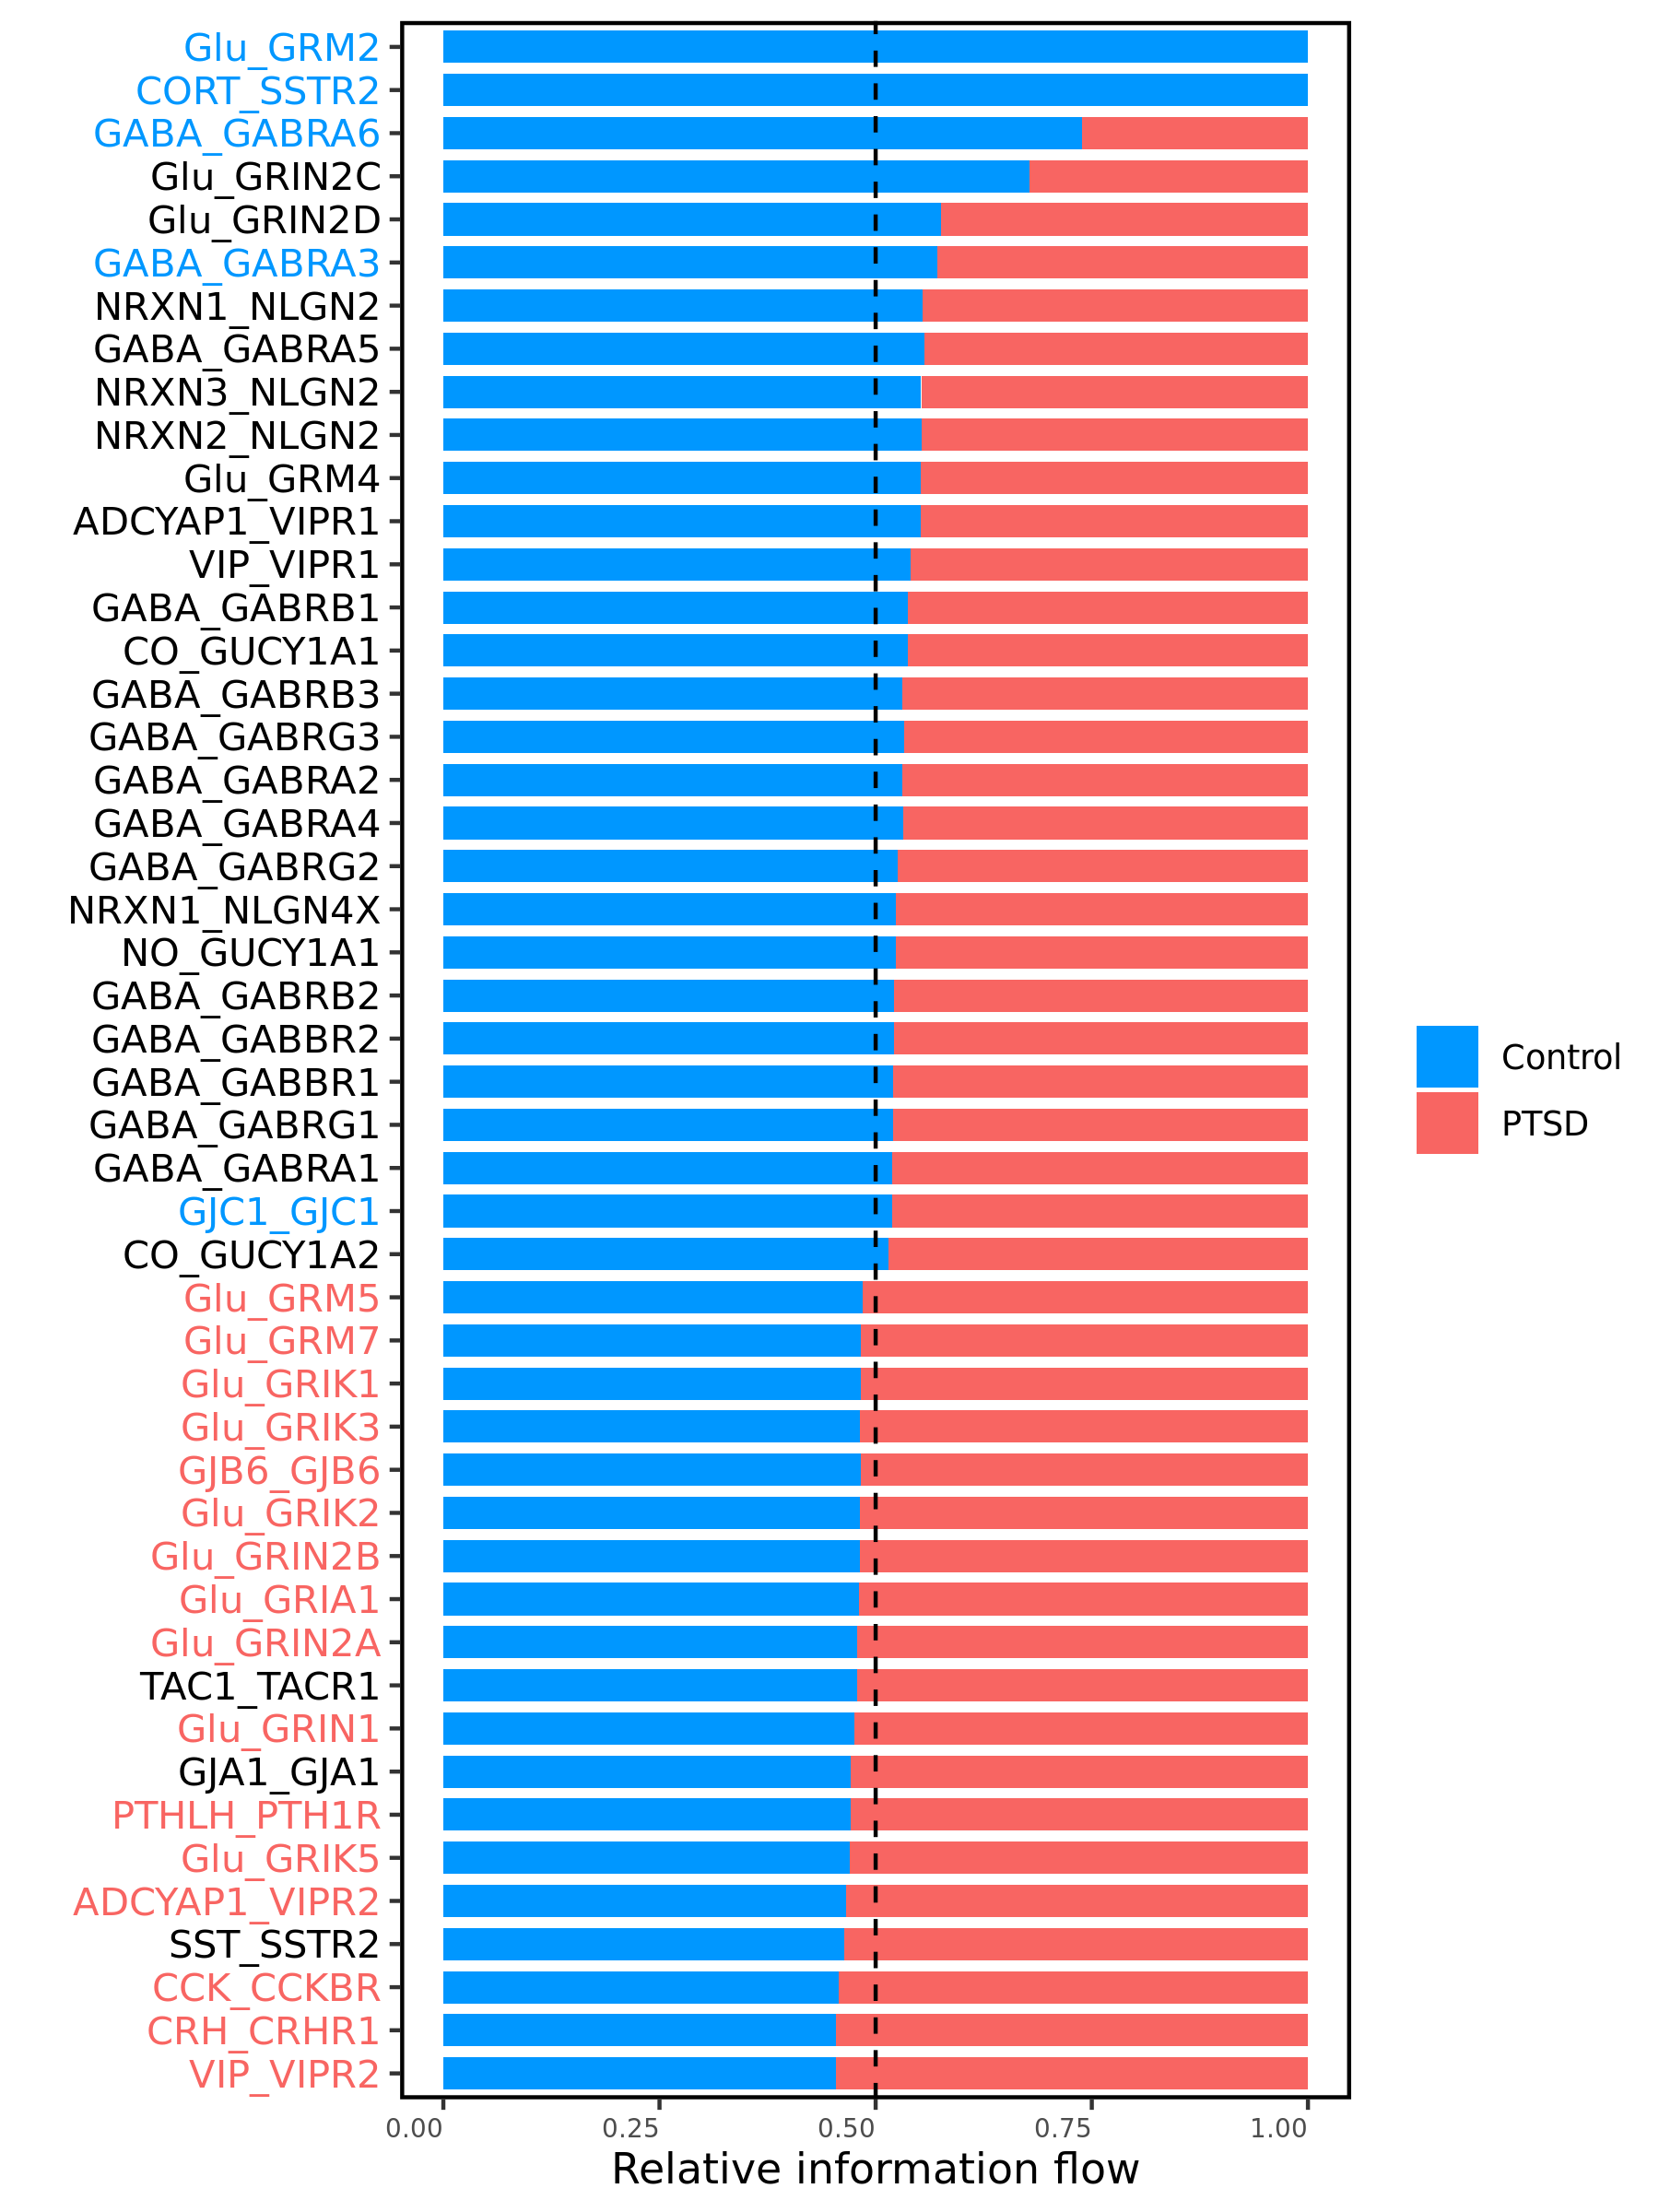

In [58]:
source("src/rankNet.r")

options(repr.plot.width = 6, repr.plot.height = 8, repr.plot.res = 300)
# pdf("out/infoFlow-PTSD-trimean.pdf", width = 6, height = 4)
rankNet_Neuron(neuronchat_obj_PTSDvCON, slot.name = "net", measure = c("weight"), mode='comparison', font.size = 10, color.use = c("#0097ff", "#F86562"), 
               stacked = TRUE, tol = 0.05, do.stat=TRUE, cutoff.pvalue = 0.05)
# dev.off()

## Input / Output

In [4]:
direction  <- "output"
agg_method <- "count"
cut_off    <- 0.2     ## Only for 'weighted_count2' and 'weight_threshold'

net_aggregated_CON  <- net_aggregation(neuronchat_obj_CON@net,  method = agg_method, cut_off = cut_off)
net_aggregated_PTSD <- net_aggregation(neuronchat_obj_PTSD@net, method = agg_method, cut_off = cut_off)
# net_aggregated_MDD  <- net_aggregation(neuronchat_obj_MDD@net,  method = agg_method, cut_off = cut_off)

### NORMALIZATION !!!
normalization_PTSD = sum(net_aggregated_CON) / sum(net_aggregated_PTSD)  # CON / PTSD
print(paste0("Ratio of CON / PTSD: ", normalization_PTSD))
# normalization_MDD = sum(net_aggregated_CON) / sum(net_aggregated_MDD)   # CON / MDD
# print(paste0("Ratio of CON / MDD:  ", normalization_MDD))

[1] "Ratio of CON / PTSD: 1.13023829087921"


In [5]:
### With Normalization
net_aggregated_diff_PTSD <- net_aggregated_PTSD*normalization_PTSD - net_aggregated_CON
# net_aggregated_diff_MDD <- net_aggregated_MDD*normalization_MDD - net_aggregated_CON

### Input / Output Visual

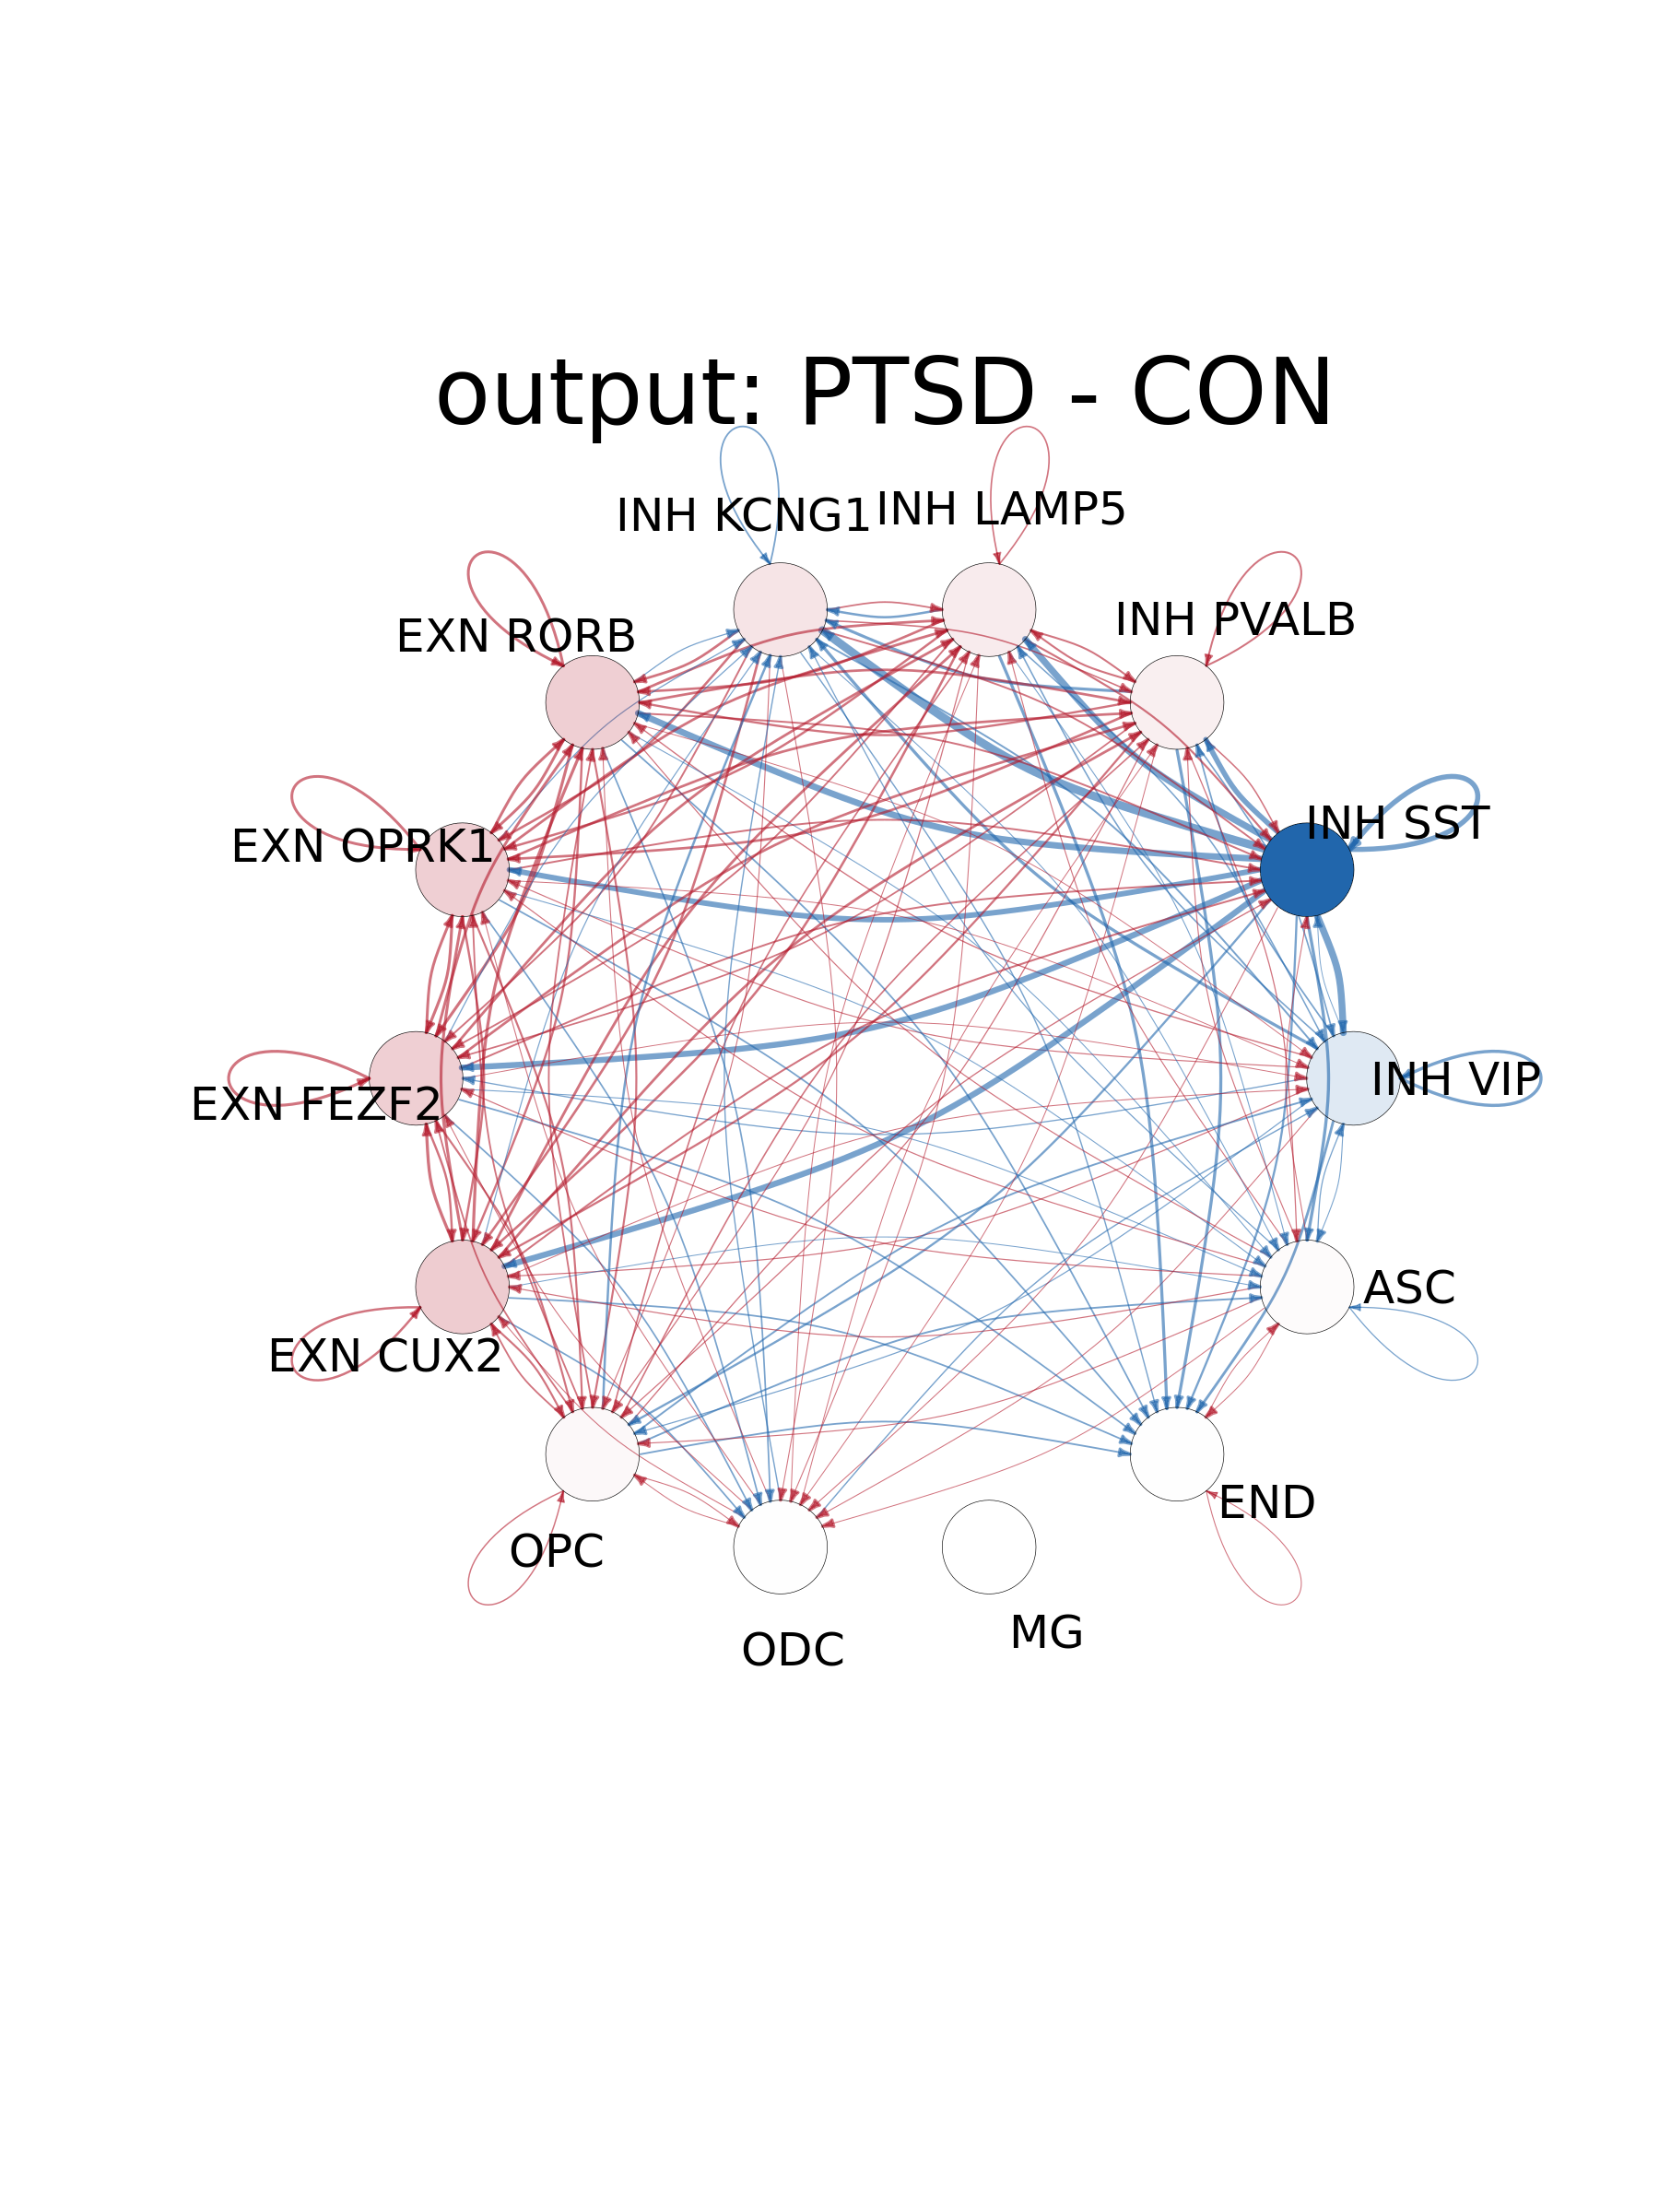

In [10]:
options(repr.plot.width = 6, repr.plot.height = 8, repr.plot.res = 300)
pltPTSD <- visual_diffInteraction(net_aggregated_diff_PTSD / 50, celltype_name = rev(celltype_name), measure = "count", node.color = direction, 
                                  title.name = glue("{direction}: PTSD - CON"), title.cex = 2)

# pdf(glue("out/{direction}Diff-PTSD_{agg_method}-mean.pdf"), width = 6, height = 8)
print(pltPTSD)
# dev.off()

# NMF

In [14]:
cutoff1 = 0.5           # cutoff for communication strength in visualizations (default is 0.5)
cutoff2 = 0.5           # cutoff for communication strength in visualizations (default is 0.5)

In [15]:
versions = seq(from = 1, to = 20, by = 1) 
# NMF methods to be used, can be "brunet" or "lee"...
methods = list("brunet")
# NMF seeding methods to be used, can be "random" or "nndsvd"...
seeds = list("random")
# NMF number of runs to be used, can be 200, 500, 1000, 2000, 5000, 10000...
nrums = list(200)

In [18]:
source("src/NMF_and_river_OUT.r")

obj_CON = NMF_and_river_OUT(neuronchat_obj_CON, study="tutorial data", disease="control", 
                            inhibitory_celltypes, excitatory_celltypes, support_celltypes, 
                            quant_threshold = 0, k = 3, chosen_version=1, parallel='p16')

obj_PTSD = NMF_and_river_OUT(neuronchat_obj_PTSD, study="tutorial data", disease="control", 
                            inhibitory_celltypes, excitatory_celltypes, support_celltypes, 
                            quant_threshold = 0, k = 3, chosen_version=1, parallel='p16')

[1] "beginning NMF"
[1] "Finished NMF"
[1] "beginning NMF"
[1] "Finished NMF"


 [1] "Glu"     "ADCYAP1" "CO"      "GJC1"    "GJA1"    "GJB6"    "NO"     
 [8] "NRXN1"   "SST"     "CCK"     "CRH"     "GABA"    "CORT"    "NRXN2"  
[15] "NRXN3"   "PTHLH"   "TAC1"    "VIP"    
[1] 18
[1] 18


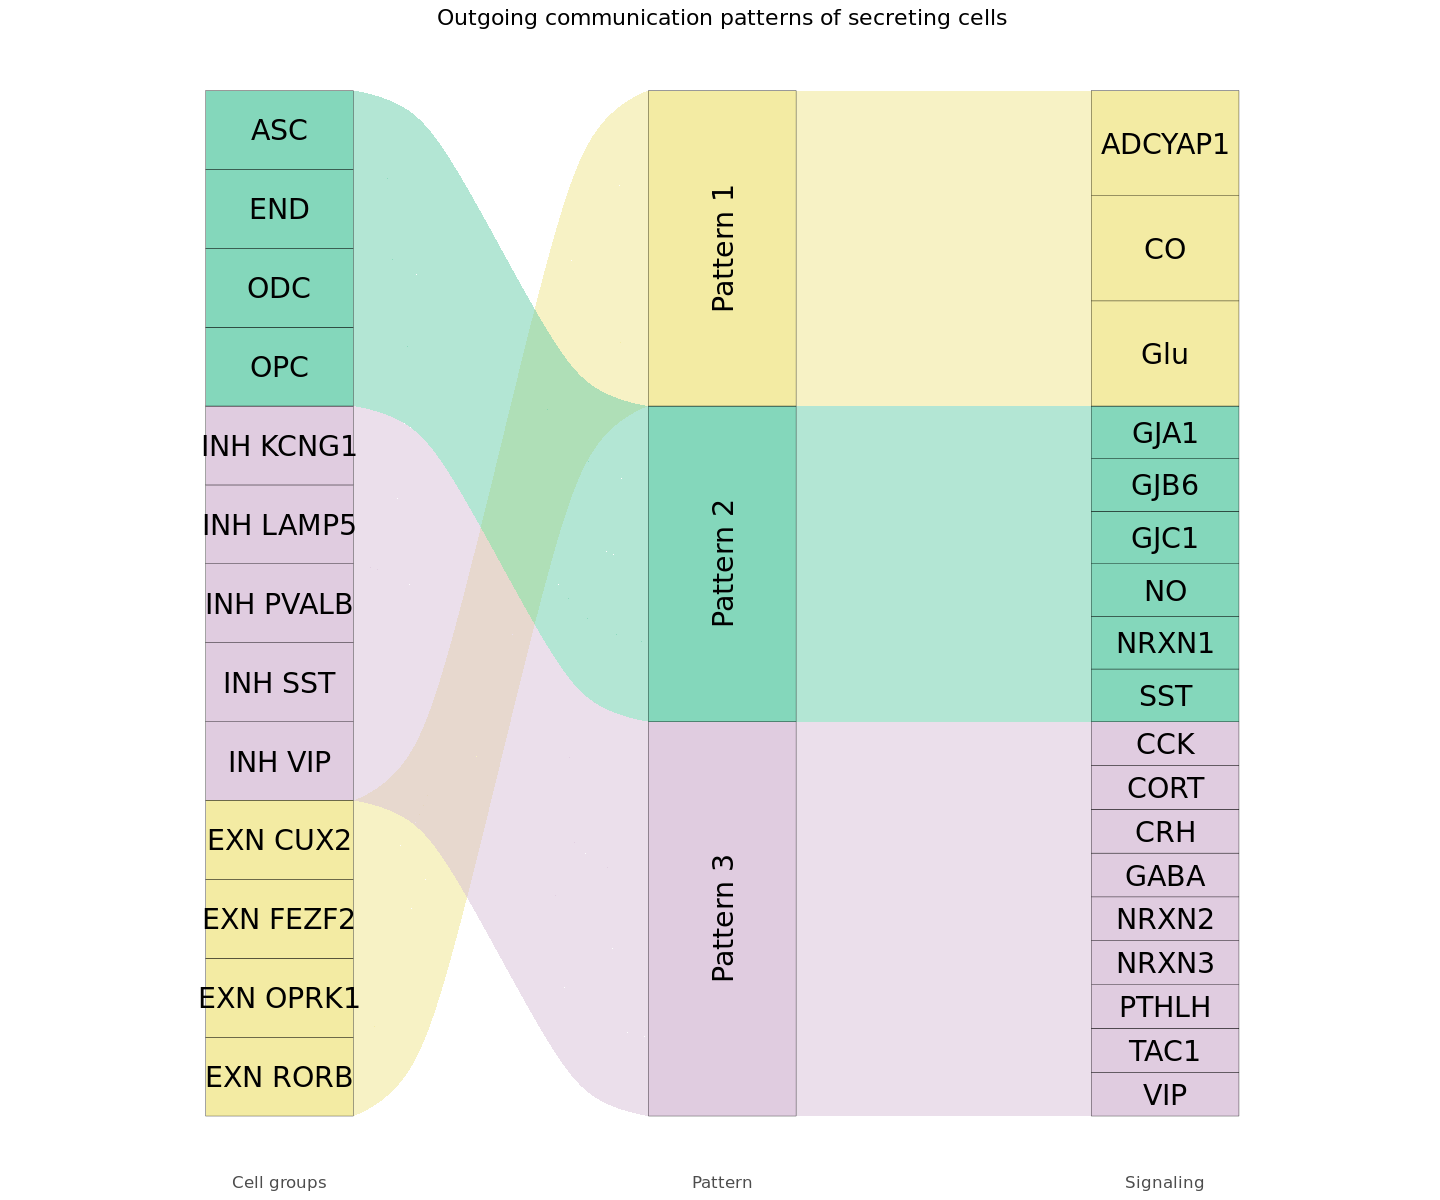

In [24]:
source("src/MY_mergedRiver.r")

options(repr.plot.width=12, repr.plot.height=10)
outgoing_ligand_order <- c()
plot_created <- my_merged_river(obj_CON, pattern = "outgoing", disease = "control", inhibitory_celltypes, excitatory_celltypes, support_celltypes)
plot_created

 [1] "NRXN3"   "GJA1"    "GJB6"    "GJC1"    "NO"      "NRXN1"   "SST"    
 [8] "ADCYAP1" "Glu"     "CO"      "CRH"     "CCK"     "NRXN2"   "GABA"   
[15] "PTHLH"   "TAC1"    "VIP"    
[1] 17
[1] 21


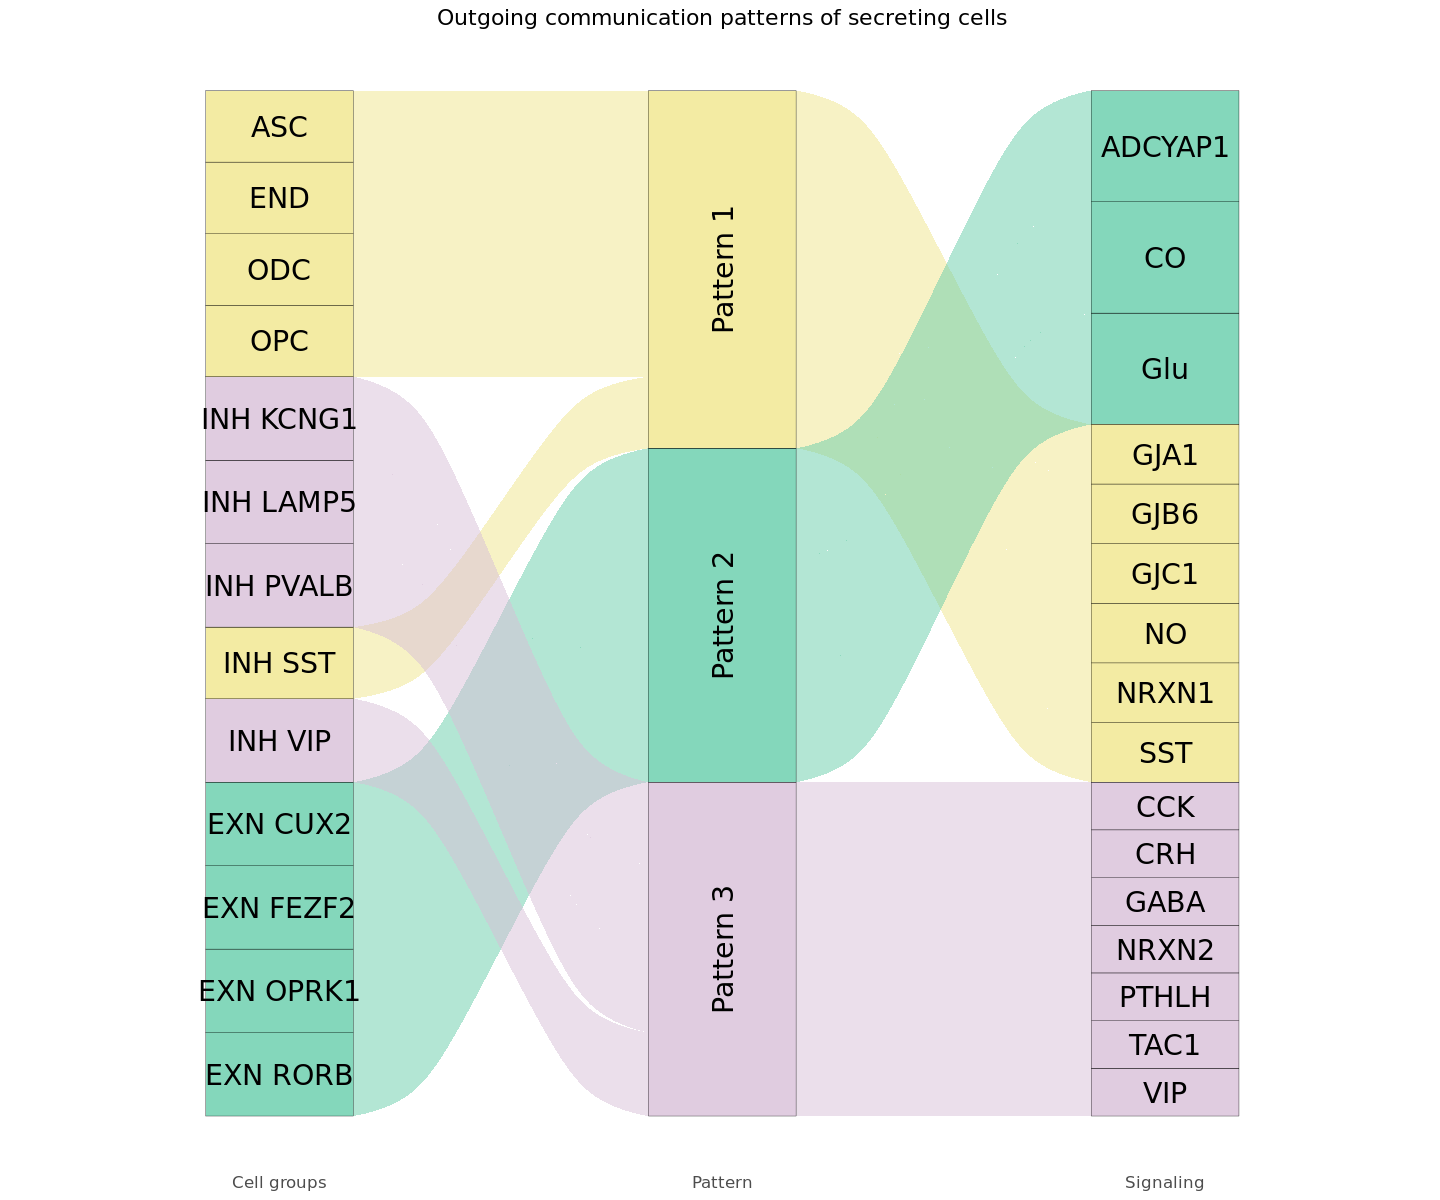

In [18]:
plot_created <- my_merged_river(obj_PTSD, pattern = "outgoing", disease = "control", inhibitory_celltypes, excitatory_celltypes, support_celltypes)
plot_created